# Atividade Prática 01 -- Processamento Digital de Imagens
Autor: Raffael Ferreira Fernandes

Curso: Ciência da Computação - CCN

Universidade Federal do Piauí

Teresina, 2023

In [ ]:
!pip install pillow

In [ ]:
!pip install matplotlib

In [ ]:
# Imports necessários para utilizar nas aplicações

import PIL
import pandas
from PIL import Image, ImageDraw
from numpy import array
import matplotlib.pyplot as plt

(275, 183)


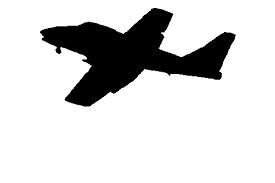

In [ ]:
im_aviao = Image.open("aviao.png")
print(im_aviao.size)
im_aviao

# 1. a) Fronteira com adjacência-8

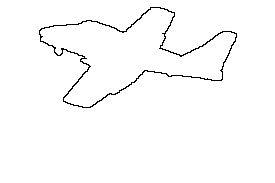

In [ ]:
def encontrar_fronteira(imagem):
    # Obtemos as dimensões da imagem
    largura, altura = imagem.size

    # Criamos uma nova imagem em branco do mesmo tamanho
    imagem_fronteira = Image.new("L", (largura, altura), 255)

    # Obtemos o objeto para desenhar na nova imagem
    desenho = ImageDraw.Draw(imagem_fronteira)

    # Obtemos os dados da imagem original
    dados_imagem = imagem.load()

    adjacentes = {}

    # Verificamos a fronteira usando adjacência-8
    for x in range(1, largura-1):
        for y in range(1, altura-1):
            pixel = dados_imagem[x, y]
            adjacentes[(x, y)] = []

            if (abs(dados_imagem[x - 1, y - 1] - pixel) < 1):
              adjacentes[(x, y)].append((x-1, y-1))
            if (abs(dados_imagem[x - 1, y + 1] - pixel) < 1):
              adjacentes[(x, y)].append((x-1, y+1))
            if (abs(dados_imagem[x + 1, y - 1] - pixel) < 1):
              adjacentes[(x, y)].append((x+1, y-1))
            if (abs(dados_imagem[x + 1, y + 1] - pixel) < 1):
              adjacentes[(x, y)].append((x+1, y+1))
            if (abs(dados_imagem[x, y - 1] - pixel) < 1):
              adjacentes[(x, y)].append((x, y-1))
            if (abs(dados_imagem[x, y + 1] - pixel) < 1):
              adjacentes[(x, y)].append((x, y+1))
            if (abs(dados_imagem[x - 1, y] - pixel) < 1):
              adjacentes[(x, y)].append((x-1, y))
            if (abs(dados_imagem[x + 1, y] - pixel) < 1):
              adjacentes[(x, y)].append((x+1, y))

            if (len(adjacentes[(x,y)]) < 8 and pixel == 0):
              desenho.point((x, y), fill=0)

    return imagem_fronteira

# Encontramos a fronteira
fronteira_aviao_8 = encontrar_fronteira(im_aviao)

# Salvamos a imagem da fronteira
fronteira_aviao_8.save("fronteira_aviao_8.png")

# Exibimos a imagem da fronteira
fronteira_aviao_8

# 1. b) Fronteira com adjacência-m

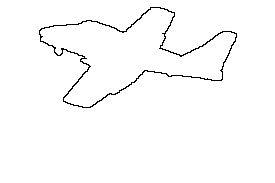

In [ ]:
def encontrar_fronteira_adj_m(imagem):
    # Obtemos as dimensões da imagem
    largura, altura = imagem.size

    # Criamos uma nova imagem em branco do mesmo tamanho
    imagem_fronteira = Image.new("L", (largura, altura), 255)

    # Obtemos o objeto para desenhar na nova imagem
    desenho = ImageDraw.Draw(imagem_fronteira)

    # Obtemos os dados da imagem original
    dados_imagem = imagem.load()

    adjacentes = {}

    # Verificamos a fronteira usando adjacência-m
    for x in range(1, largura- 1):
        for y in range(1, altura - 1):
            pixel = dados_imagem[x, y]
            adjacentes[(x, y)] = []

            front = 8

            # Primeiro, verificamos apenas os vizinhos mais próximos laterais do pixel
            if (abs(dados_imagem[x, y - 1] - pixel) < 1):
              adjacentes[(x, y)].append((x, y-1))
              front -= 1
            if (abs(dados_imagem[x, y + 1] - pixel) < 1):
              front -= 1
              adjacentes[(x, y)].append((x, y+1))
            if (abs(dados_imagem[x - 1, y] - pixel) < 1):
              front -= 1
              adjacentes[(x, y)].append((x-1, y))
            if (abs(dados_imagem[x + 1, y] - pixel) < 1):
              front -= 1
              adjacentes[(x, y)].append((x+1, y))

            # Agora, verifica os pixels da diagonal, inserindo-os como adjacentes apenas caso
            # a interseção dos vizinhos laterais do pixel diagonal com os vizinhos laterais do pixel atual
            # seja nula
            if (abs(dados_imagem[x - 1, y - 1] - pixel) < 1):
              if ((x - 1, y) not in adjacentes[(x, y)] and (x, y - 1) not in adjacentes[(x, y)]):
                adjacentes[(x, y)].append((x-1, y-1))
              front -= 1
            if (abs(dados_imagem[x - 1, y + 1] - pixel) < 1):
              if ((x - 1, y) not in adjacentes[(x, y)] and (x, y + 1) not in adjacentes[(x, y)]):
                adjacentes[(x, y)].append((x-1, y+1))
              front -= 1
            if (abs(dados_imagem[x + 1, y + 1] - pixel) < 1):
              if ((x + 1, y) not in adjacentes[(x, y)] and (x, y + 1) not in adjacentes[(x, y)]):
                adjacentes[(x, y)].append((x+1, y+1))
              front -= 1
            if (abs(dados_imagem[x + 1, y - 1] - pixel) < 1):
              if ((x + 1, y) not in adjacentes[(x, y)] and (x, y - 1) not in adjacentes[(x, y)]):
                adjacentes[(x, y)].append((x+1, y-1))
              front -= 1

            # Se o pixel faz adjacência com algum pixel do fundo, ele faz parte da fronteira
            if (front > 0 and pixel < 1):
              desenho.point((x, y), fill=0)

    return imagem_fronteira

# Encontramos a fronteira
fronteira_aviao_m = encontrar_fronteira(im_aviao)

# Salvamos a imagem da fronteira
fronteira_aviao_m.save("fronteira_aviao_m.png")

# Exibimos a imagem da fronteira
fronteira_aviao_m

Agora, verifiquemos se houve alguma diferença entre as imagens cujas fronteiras foram geradas utilizando adjacência-8 e adjacência-m:

In [ ]:
def funcao_dif_entre_im(imagem1, imagem2):
  # Boolean que será setado para True caso seja detectado que uma mesma coordenada nas duas imagens
  # possuam valores distintos entre si
  dif = False

  largura, altura = imagem1.size
  dados_im1 = imagem1.load()
  dados_im2 = imagem2.load()
  # Itera pelas duas imagens, verificando a mesma coordenada em ambas
  for x in range(1, largura - 1):
    for y in range(1, altura - 1):
      # Caso a mesma coordenada nas duas imagens apresentem valores diferentes entre si,
      # a diferença será detectada.
      if dados_im1[x, y] != dados_im2[x, y]:
        dif = True

  if (dif == True):
    return "Diferenças foram encontradas."
  else:
    return "Nenhuma diferença foi encontrada."

print(funcao_dif_entre_im(fronteira_aviao_8, fronteira_aviao_m))

Nenhuma diferença foi encontrada.


Dessa maneira, podemos concluir que, apesar da adjacência-m reduzir as ambiguidades entre vizinhos que seriam causadas utilizando a adjacência-8, o resultado da fronteira obtido é o mesmo para os dois algoritmos.

# 2. a) Histograma

Podemos plotar em um gráfico o histograma de uma imagem digital. Para isso, utilizamos uma função discreta h(rk) = nk, onde rk é o k-ésimo valor de intensidade e nk é o número total de pixels da imagem com intensidade rk.
O histograma nos permite analisar a distribuição de intensidade dos pixels, podendo nos oferecer informações sobre contraste e luminosidade de uma imagem.

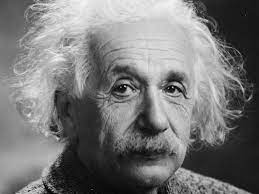

In [ ]:
# Carregamos a imagem com tons de cinza, abrindo com o parâmetro "L"
imagem_einstein = Image.open("einstein.jpg").convert("L")
imagem_einstein

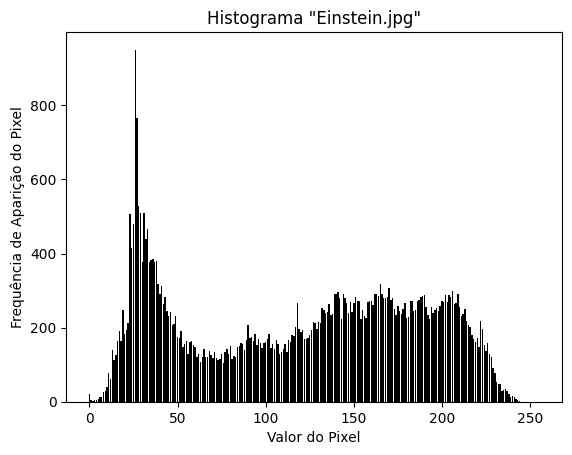

In [ ]:
# Obtemos os dados da imagem
dados_imagem_einstein = imagem_einstein.load()
largura_einstein, altura_einstein = imagem_einstein.size

# Criamos uma lista para guardar a frequência de aparição de valores para cada pixel da figura
histograma = [0] * 256

# Calculamos o histograma
for x in range(largura_einstein):
    for y in range(altura_einstein):
        pixel = dados_imagem_einstein[x, y]
        # Incrementamos a quantidade de pixels do pixel de valor "rk"
        histograma[pixel] += 1

# Criamos uma lista para guardar os valores dos pixels (de 0 até 255, pois a imagem está em escalas de cinza)
valores_pixel = list(range(256))

# Plotamos o histograma com o auxílio da biblioteca Matplotlib
plt.bar(valores_pixel, histograma, color="black")
plt.title("Histograma \"Einstein.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Frequência de Aparição do Pixel")
plt.show()


In [ ]:
# De forma geral, podemos implementar uma função que calcula o histograma de uma imagem:
def calc_histograma(imagem):
  largura, altura = imagem.size
  dados_imagem = imagem.load()
  histograma = [0] * 256

  for x in range(largura):
    for y in range(altura):
      pixel = dados_imagem[x, y]
      histograma[pixel] += 1

  return histograma


# b) Histograma Normalizado
É dado pela divisão da frequência de aparição de cada pixel pela quantidade de pixels total da imagem. Serve como uma espécie de cálculo probabilístico de aparição de um valor de intensidade para a imagem, de modo que a soma total dos valores de um histograma normalizado é 1 (ou 100%).

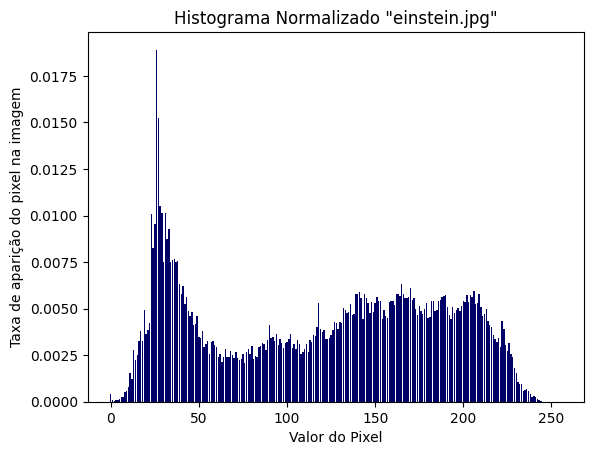

In [ ]:
valores_norm = list(range(256))

hist_norm = [0] * 256

total_pixels_einstein = largura_einstein * altura_einstein

# Para cada pixel do histograma, dividimos o valor pela quantidade total de pixels da imagem
for x in range(len(histograma)):
  hist_norm[x] = histograma[x]/(total_pixels_einstein)

# Plotamos o histograma normalizado com o auxílio da biblioteca Matplotlib
plt.bar(valores_norm, hist_norm, color="#000066")
plt.title("Histograma Normalizado \"einstein.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Taxa de aparição do pixel na imagem")
plt.show()

In [ ]:
# De forma geral, podemos implementar uma função que calcula o histograma normalizado de uma imagem:
def calc_hist_norm(histograma, imagem):
  largura, altura = imagem.size
  total_pixels_im = largura * altura
  hist_norm = [0] * 256

  for x in range(len(histograma)):
    hist_norm[x] = (histograma[x]/(total_pixels_im))

  return hist_norm

# c) Histograma Acumulado

O histograma acumulado nada mais é do que acumular a frequência de aparição das intensidades dos pixels conforme os valores de intensidade são iterados. Ao final do histograma, a última coluna do gráfico deve apresentar a quantidade total de pixels da imagem (100%).

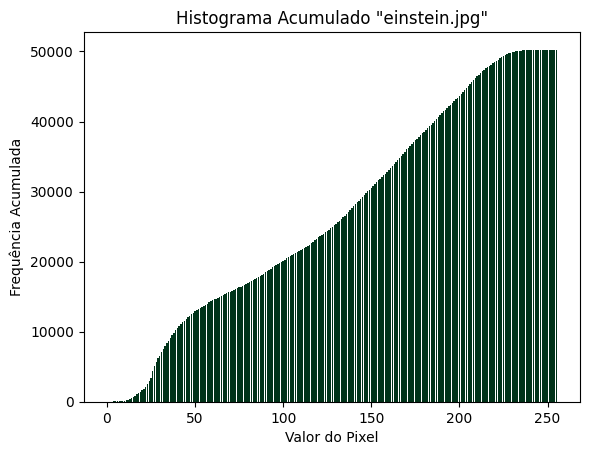

In [ ]:
# Calculamos o histograma acumulado da figura somando as aparições das intensidades de pixels da imagem
hist_acumulado = [sum(histograma[:i+1]) for i in range(len(histograma))]

valores_acum = list(range(256))

# Plotar o histograma acumulado
plt.bar(valores_acum, hist_acumulado, color='#003319')
plt.title("Histograma Acumulado \"einstein.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Frequência Acumulada")
plt.show()

In [ ]:
# De forma geral, podemos implementar uma função que calcula o histograma acumulado de uma imagem:
def calc_hist_acum(histograma):
  hist_acumulado = [sum(histograma[:i+1]) for i in range(len(histograma))]

  return hist_acumulado

# Nesse caso, a função recebe um histograma como parâmetro, que pode ou não ser normalizado

# 3) Função de Equalização para as imagens

Para equalizar uma imagem, teremos como ideia fundamental equalizar os valores dos pixels desta imagem, de forma que seus níveis estejam uniformemente distribuídos em todo os valores possíveis do intervalo de intensidade. Assim, tendo como resultado um realce no contraste da imagem e permitindo a percepção de detalhes, antes mais difícil de serem observados.

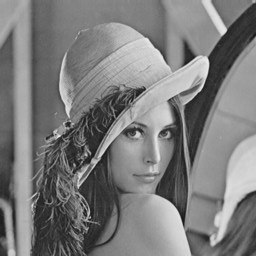

In [ ]:
# Carregamos a imagem da Lena com tons de cinza, abrindo com o parâmetro "L"
imagem_lena = Image.open("lena_gray.bmp").convert("L")
imagem_lena

In [ ]:
# Implementamos uma função que recebe como parâmetro uma imagem e retorna uma nova imagem equalizada,
# a partir da imagem original.

def funcao_equalizacao(imagem):

  # Coletamos os dados da imagem (largura, altura, número total de pixels e dados de intensidade)
  larg_im, alt_im = imagem.size
  total_pixels_im = larg_im * alt_im
  dados_im = imagem.load()

  # Calculamos o histograma da imagem com base na função já implementada na questão 2.a)
  histograma_im = calc_histograma(imagem)

  # Calculamos o coeficiente de distribuição acumulativo da imagem
  cdf = [0] * 256
  cdf[0] = histograma_im[0]
  for i in range(1, 256):
      cdf[i] = cdf[i - 1] + histograma_im[i]

  # Criamos um novo histograma aplicando uma função de equalização baseada
  # na distribuição acumulada da imagem.
  # Para cada pixel de instensidade, iremos multiplicar o CDF do pixel pelo valor máximo de intensidade e
  # dividir o resultado pela quantidade total de pixels, arrendondando para o inteiro mais próximo.
  equalizacao = [round(255 * cdf[i] / total_pixels_im) for i in range(256)]

  # Criamos uma imagem vazia de mesmo tamanho para gerar uma nova imagem equalizada
  imagem_equalizada = Image.new("L", (larg_im, alt_im))
  dados_equalizados_im = imagem_equalizada.load()

  # Preenchemos a nova imagem gerada, de modo que, para cada pixel analisado, obtemos o novo valor equalizado
  # daquele pixel e substituímos esse novo valor de intensidade para o pixel atual.
  for x in range(larg_im):
      for y in range(alt_im):
          pixel = dados_im[x, y]
          novo_pixel = equalizacao[pixel]
          dados_equalizados_im[x, y] = novo_pixel

  # Retornamos a imagem final, já equalizada
  return imagem_equalizada

# Salvamos as novas imagens equalizadas
imagem_equalizada_einstein = funcao_equalizacao(imagem_einstein)
imagem_equalizada_lena = funcao_equalizacao(imagem_lena)

imagem_equalizada_einstein.save("imagem_equalizada_einstein.jpg")
imagem_equalizada_lena.save("imagem_equalizada_lena.jpg")

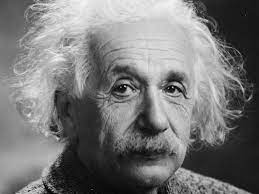

In [ ]:
imagem_einstein

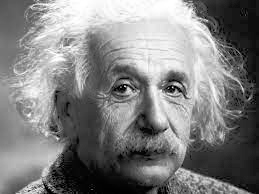

In [ ]:
imagem_equalizada_einstein

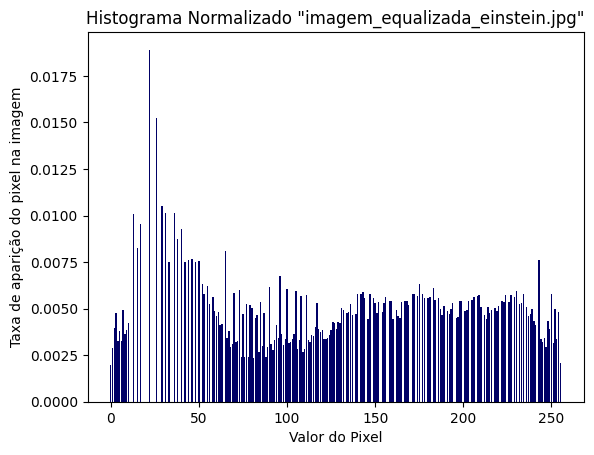

In [ ]:
valores_norm = list(range(256))
# Plotamos o histograma normalizado com o auxílio da biblioteca Matplotlib
plt.bar(valores_norm, calc_hist_norm(calc_histograma(imagem_equalizada_einstein), imagem_equalizada_einstein), color="#000066")
plt.title("Histograma Normalizado \"imagem_equalizada_einstein.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Taxa de aparição do pixel na imagem")
plt.show()

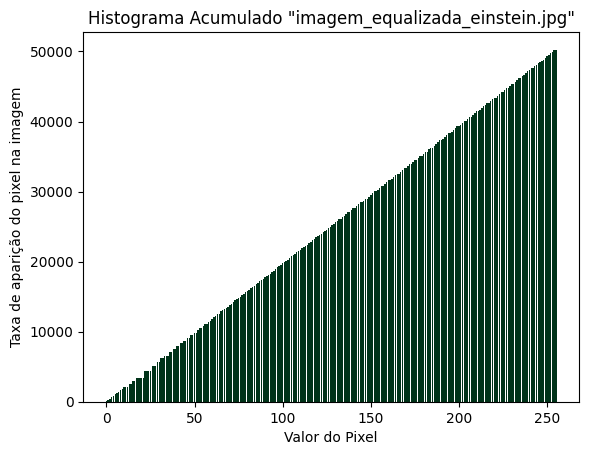

In [ ]:
valores_acum = list(range(256))
# Plotamos o histograma acumulado com o auxílio da biblioteca Matplotlib
plt.bar(valores_acum, calc_hist_acum(calc_histograma(imagem_equalizada_einstein)), color="#003319")
plt.title("Histograma Acumulado \"imagem_equalizada_einstein.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Taxa de aparição do pixel na imagem")
plt.show()

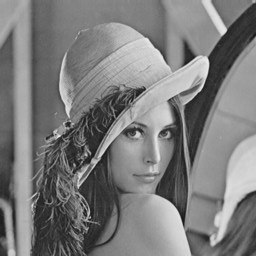

In [ ]:
imagem_lena

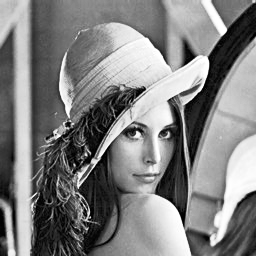

In [ ]:
imagem_equalizada_lena

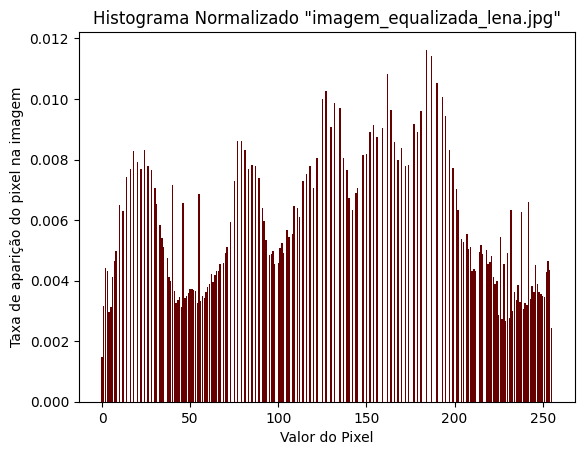

In [ ]:
valores_norm = list(range(256))
# Plotamos o histograma normalizado com o auxílio da biblioteca Matplotlib
plt.bar(valores_norm, calc_hist_norm(calc_histograma(imagem_equalizada_lena), imagem_equalizada_lena), color="#660000")
plt.title("Histograma Normalizado \"imagem_equalizada_lena.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Taxa de aparição do pixel na imagem")
plt.show()

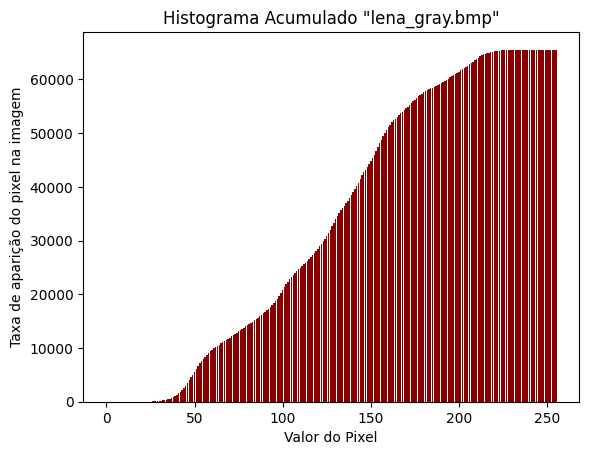

In [ ]:
valores_acum = list(range(256))
# Plotamos o histograma acumulado com o auxílio da biblioteca Matplotlib
plt.bar(valores_acum, calc_hist_acum(calc_histograma(imagem_lena)), color="#880000")
plt.title("Histograma Acumulado \"lena_gray.bmp\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Taxa de aparição do pixel na imagem")
plt.show()

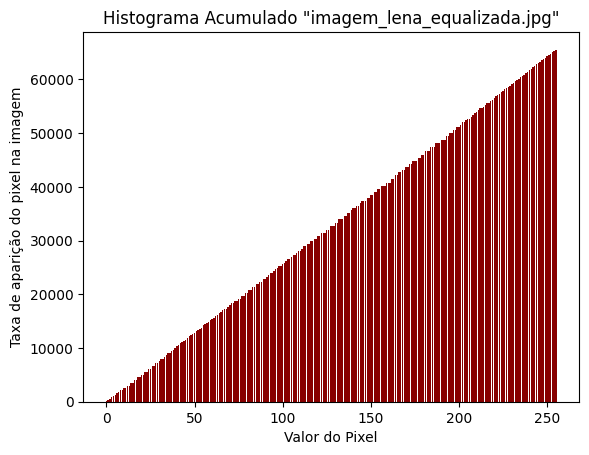

In [ ]:
valores_acum = list(range(256))
# Plotamos o histograma acumulado com o auxílio da biblioteca Matplotlib
plt.bar(valores_acum, calc_hist_acum(calc_histograma(imagem_equalizada_lena)), color="#880000")
plt.title("Histograma Acumulado \"imagem_lena_equalizada.jpg\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Taxa de aparição do pixel na imagem")
plt.show()

# 3) b) Equalizando as imagens equalizadas.

In [ ]:
# Re-equalizamos as duas imagens
seg_equalizacao_einstein = funcao_equalizacao(imagem_equalizada_einstein)
seg_equalizacao_lena = funcao_equalizacao(imagem_equalizada_lena)

seg_equalizacao_einstein.save("seg_eq_einstein.jpg")
seg_equalizacao_lena.save("seg_eq_lena.jpg")

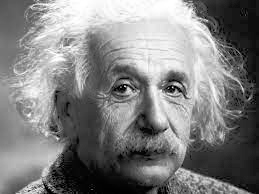

In [ ]:
# Segunda equalização da imagem de Einstein
seg_equalizacao_einstein

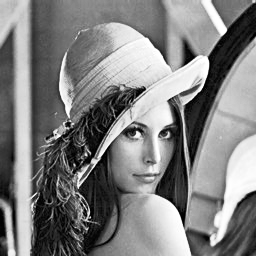

In [ ]:
# Segunda equalização da imagem de Lena
seg_equalizacao_lena

A olho nu, é imperceptível qualquer tipo de possível diferença entre as imagens equalizadas e as imagens que foram equalizadas novamente. Porém, podemos utilizar a mesma função implementada na questão 1.b) para verificar se há alguma diferença entre os pixels de mesmas coordenadas das duas imagens comparadas.

In [ ]:
# Primeiro, comparando as imagens equalizadas de Einstein:
print(funcao_dif_entre_im(imagem_equalizada_einstein, seg_equalizacao_einstein))

Nenhuma diferença foi encontrada.


In [ ]:
# Agora, comparando as imagens equalizadas de Lena:
print(funcao_dif_entre_im(imagem_equalizada_lena, seg_equalizacao_lena))

Nenhuma diferença foi encontrada.


Para ambas as imagens, nenhuma diferença foi encontrada, assim como esperado. Isso pode ser justificado devido ao fato da função de equalização ser uma distribuição determinística de mapeamento uniforme dos pixels da imagem. Isso ocorre de tal maneira que, caso a imagem seja equalizada novamente, os pixels serão apenas redistribuídos da mesma maneira que haviam sido pela primeira vez, uma vez que será recalculado o mapeamento com exatamente os mesmos valores de frequência de distribuição, resultando na mesma saída de função, já otimizada.

# 4) Aplicando as transformações lineares em uma imagem

In [ ]:
# Primeiro, implementaremos as três funções descritas da atividade para realizar uma transformação linear em uma imagem

# g = c * f + b
def primeira_transf(imagem, c, b):
  largura, altura = imagem.size
  dados_im = imagem.load()

  nova_imagem = Image.new("L", (largura, altura))
  dados_nova_im = nova_imagem.load()

  for x in range(largura):
    for y in range(altura):
      dados_nova_im[x, y] = round(c*dados_im[x, y]) + b

  return nova_imagem




# Biblioteca importada para calcular o log na base 2 de (f + 1)
import numpy as np

# g = c * (lg(f + 1))
def segunda_transf(imagem, c):
  largura, altura = imagem.size
  dados_im = imagem.load()

  nova_imagem = Image.new("L", (largura, altura))
  dados_nova_im = nova_imagem.load()

  for x in range(largura):
    for y in range(altura):
      dados_nova_im[x, y] = c * round(np.log2(dados_im[x, y] + 1))

  return nova_imagem



  # g = c * exp(f + 1)
def terc_transf(imagem, c):
  largura, altura = imagem.size
  dados_im = imagem.load()

  nova_imagem = Image.new("L", (largura, altura))
  dados_nova_im = nova_imagem.load()

  for x in range(largura):
    for y in range(altura):
      pixel_antigo = float((dados_im[x, y]+1)/255) # normaliza o pixel antigo de 0 a 1
      dados_nova_im[x, y] = round(c*255*pixel_antigo)

  return nova_imagem

# 4) a) g = c * f + b

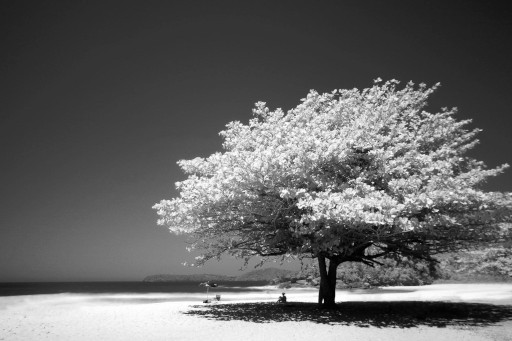

In [ ]:
im_arvore = Image.open("arvore.jpg").convert("L")
im_arvore

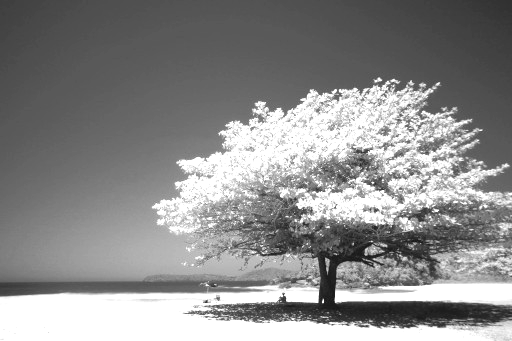

In [ ]:
# Testando a primeira função para os valores c = 1.2, b = 25 na imagem "arvore.jpg"
im_nova_arvore1 = primeira_transf(im_arvore, 1.2, 25)
im_nova_arvore1.save("arvore1_1a_transf.jpg")
im_nova_arvore1

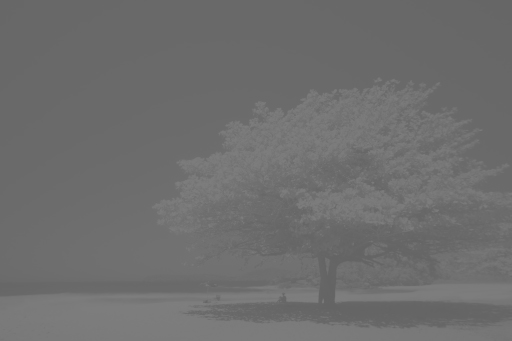

In [ ]:
# Testando a primeira função para os valores c = 0.1, b = 100 na imagem "arvore.jpg"
im_nova_arvore2 = primeira_transf(im_arvore, 0.1, 100)
im_nova_arvore2.save("arvore2_1a_transf.jpg")
im_nova_arvore2

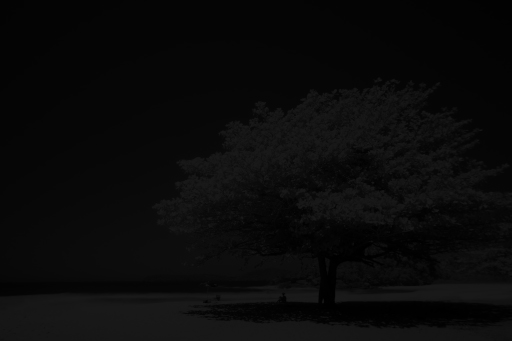

In [ ]:
# Testando a primeira função para os valores c = 0.1, b = 0 na imagem "arvore.jpg"
im_nova_arvore3 = primeira_transf(im_arvore, 0.1, 0)
im_nova_arvore3.save("arvore3_1a_transf.jpg")
im_nova_arvore3

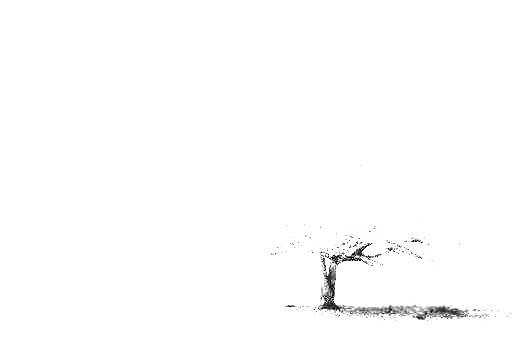

In [ ]:
# Testando a primeira função para os valores c = 20, b = -15 na imagem "arvore.jpg"
im_nova_arvore4 = primeira_transf(im_arvore, 20, -15)
im_nova_arvore4.save("arvore4_1a_transf.jpg")
im_nova_arvore4

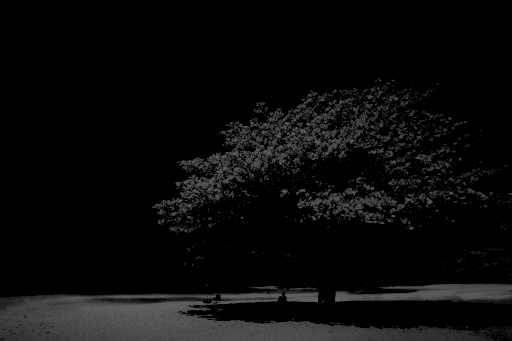

In [ ]:
# Testando a primeira função para os valores c = 1.0, b = -160 na imagem "arvore.jpg"
im_nova_arvore5 = primeira_transf(im_arvore, 1.0, -160)
im_nova_arvore5.save("arvore_1a_transf.jpg")
im_nova_arvore5

Para a primeira função, é perceptível que, para valores positivos de "c" muito próximos a 0, a imagem tende a ter uma luminosidade muito baixa (imagem 3), enquanto que, para valores maiores que 1 (imagem 1), a imagem tende a ter uma luminosidade mais alta. Valores muito altos para "c" tendem a tornar a imagem completamente branca (imagem 4), pois todos os pixels são multiplicados por um fator elevado (e o pixel de intensidade limite de uma imagem em escala de cinza possui valor 255). Para valores entre 0 e 1, a proporcionalidade é mantida para a maioria dos pixels, por ser um fator de multiplicidade que afeta a todos na mesma proporção (exceto para valores que são diferentes mas, ao serem arredondados, recebem o mesmo valor inteiro de intensidade).

Ao analisarmos a influência da variável "b" na transformação linear, percebemos que, para valores de "b" muito extremos (imagens 2 e 5), o contraste de pixels da imagem é muito prejudicado, pois as proporções entre os pixels são completamente modificadas. Por exemplo, na imagem 5, ao substrair o valor 160 de intensidade de todos os pixels, todas as coordenadas da imagem original que possuírem pixel com intensidade no intervalo fechado de 0 até 160 receberão "0" como novo valor. Assim, pixels que originalmente apresentavam altas diferenças de intensidade, agora são idênticos.

# 4) b) g = c * ln(f + 1)

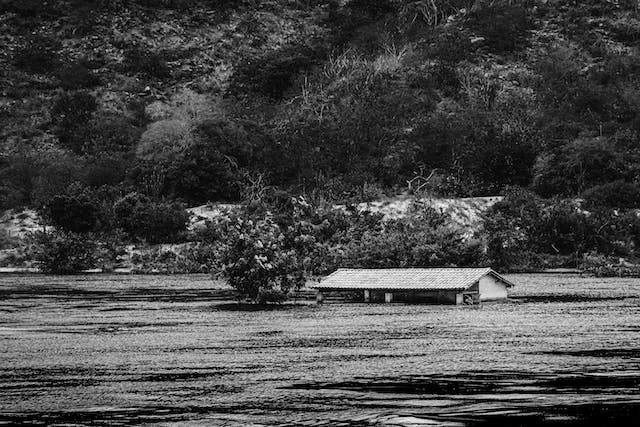

In [ ]:
im_casa = Image.open("casa.jpg").convert("L")
im_casa

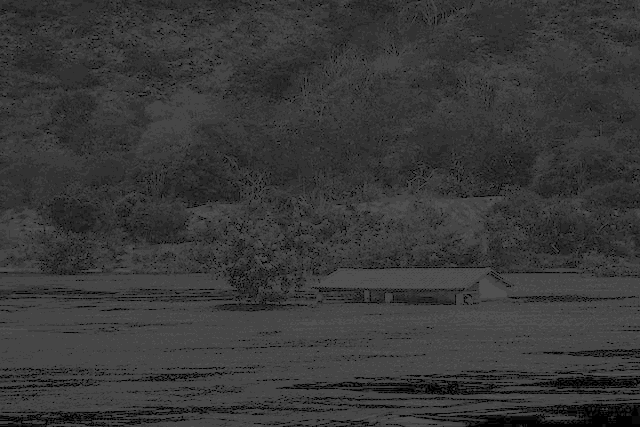

In [ ]:
# Testando a segunda função para o valor c = 10 na imagem "casa.jpg"
im_nova_casa1 = segunda_transf(im_casa, 10)
im_nova_casa1.save("casa1_2a_transf.jpg")
im_nova_casa1

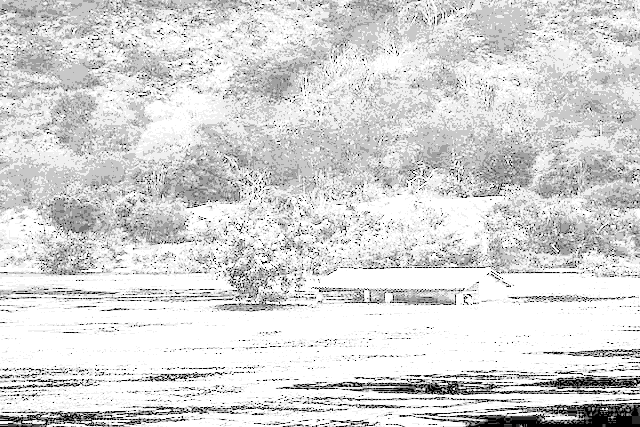

In [ ]:
# Testando a segunda função para o valor c = 40 na imagem "casa.jpg"
im_nova_casa2 = segunda_transf(im_casa, 40)
im_nova_casa2.save("casa1_2a_transf.jpg")
im_nova_casa2

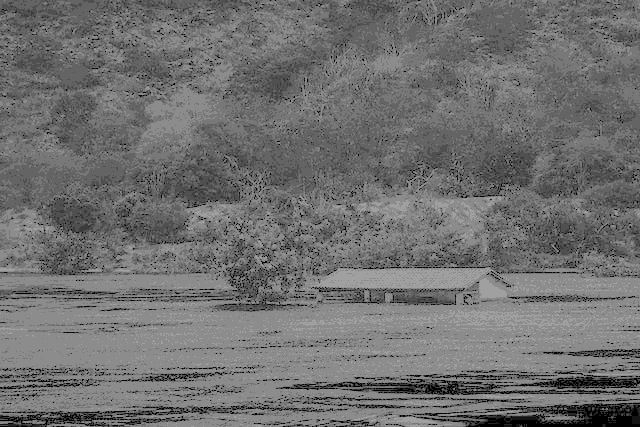

In [ ]:
# Testando a segunda função para o valor c = 75 na imagem "casa.jpg"
im_nova_casa3 = segunda_transf(im_casa, 20)
im_nova_casa1.save("casa3_2a_transf.jpg")
im_nova_casa3

Para valores de "c" muito baixos, a segunda transformação tende a deixar a imagem como um todo mais escura (imagem 1). Utilizando um valor de "c" igual a 20 (imagem 3), pôde-se perceber um realce maior em áreas de menor intensidade, como por exemplo, as regiões escuras do rio e algumas árvores da mata fechada ao fundo. No entanto, para regiões originalmente de maior intensidade, o contraste é reduzido (imagem 2), devido ao comportamento da função logarítmica. Quanto maior for o valor de "c", maior será a compressão de contraste das regiões de alta intensidade.

# 4) c) g = c * exp(f + 1)

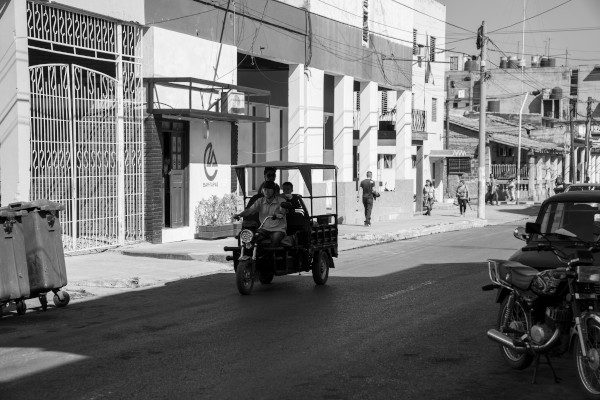

In [ ]:
im_rua = Image.open("rua.jpg").convert("L")
im_rua

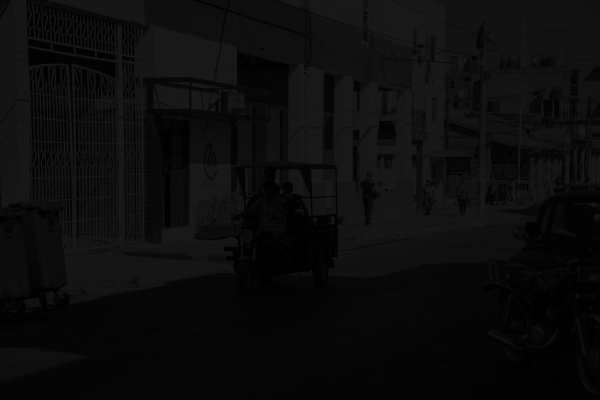

In [ ]:
# Testando a terceira função para o valor c = 0.1 na imagem "rua.jpg"
im_nova_rua1 = terc_transf(im_rua, 0.1)
im_nova_rua1.save("rua1_3a_transf.jpg")
im_nova_rua1

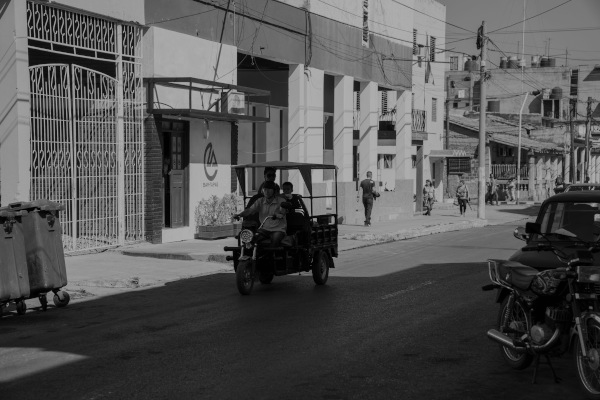

In [ ]:
# Testando a terceira função para o valor c = 0.7 na imagem "rua.jpg"
im_nova_rua2 = terc_transf(im_rua, 0.7)
im_nova_rua2.save("rua2_3a_transf.jpg")
im_nova_rua2

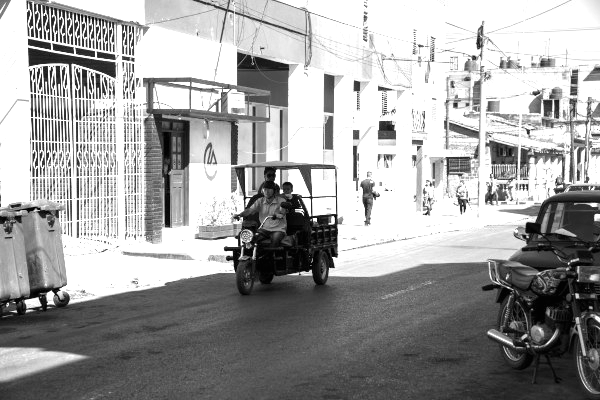

In [ ]:
# Testando a terceira função para o valor c = 1.5 na imagem "rua.jpg"
im_nova_rua3 = terc_transf(im_rua, 1.5)
im_nova_rua3.save("rua3_3a_transf.jpg")
im_nova_rua3

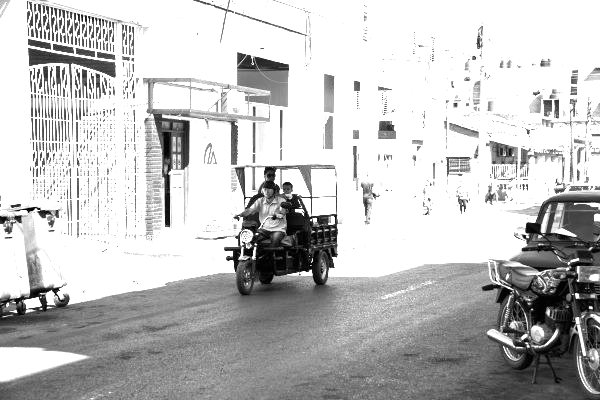

In [ ]:
# Testando a terceira função para o valor c = 2.5 na imagem "rua.jpg"
im_nova_rua4 = terc_transf(im_rua, 2.5)
im_nova_rua4.save("rua4_3a_transf.jpg")
im_nova_rua4

# 5) Especificando o histograma de outra imagem.

In [ ]:
def especificar_histograma(imagem1, imagem2):
    hist_im2 = calc_histograma(imagem2)
    hist_norm_im2 = calc_hist_norm(hist_im2, imagem2)

    hist_acum_norm_im2 = calc_hist_acum(hist_norm_im2)
    for i in range(len(hist_acum_norm_im2)):
        hist_acum_norm_im2[i] = round(255 * hist_acum_norm_im2[i])

    mapeamento = {}

    hist_im1 = calc_histograma(imagem1)
    hist_norm_im1 = calc_hist_norm(hist_im1, imagem1)

    hist_acum_norm_im1 = calc_hist_acum(hist_norm_im1)
    for i in range(len(hist_acum_norm_im1)):
        hist_acum_norm_im1[i] = round(255 * hist_acum_norm_im1[i])


    for i in range(len(hist_acum_norm_im1)):
        if hist_acum_norm_im1[i] not in mapeamento:
            mapeamento[hist_acum_norm_im1[i]] = [i]
        else:
            mapeamento[hist_acum_norm_im1[i]].append(i)

    mapeamento_sk_zq = {}

    for i in range(len(hist_acum_norm_im2)):
        diferenca_minima = 256
        chave_mais_aproximada = None

        for chave in mapeamento.keys():
            diferenca = abs(hist_acum_norm_im2[i] - chave)

            if diferenca < diferenca_minima:
                diferenca_minima = diferenca
                chave_mais_aproximada = chave

        if chave_mais_aproximada is not None:
            mapeamento_sk_zq[hist_acum_norm_im2[i]] = mapeamento[chave_mais_aproximada][0]

    largura, altura = imagem2.size
    im2_especificada = Image.new("L", (largura, altura))
    dados_f2_especificada = im2_especificada.load()
    dados_f2 = imagem2.load()

    for x in range(largura):
        for y in range(altura):
            pixel = hist_acum_norm_im2[dados_f2[x, y]]
            novo_pixel = mapeamento_sk_zq[pixel]
            dados_f2_especificada[x, y] = novo_pixel

    return im2_especificada


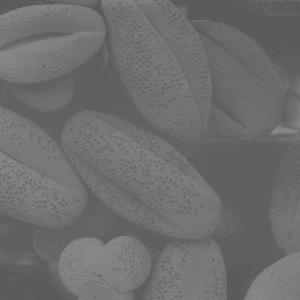

In [ ]:
im_polen = Image.open("polen.png").convert("L")
im_polen

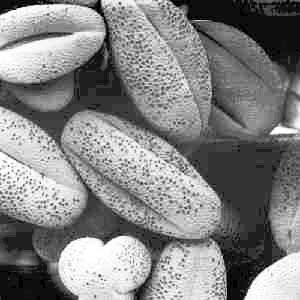

In [ ]:
# Equalizamos a imagem "polen.png" primeiro
im_polen_eq = funcao_equalizacao(im_polen)
im_polen_eq.save("polen_eq.png")
im_polen_eq

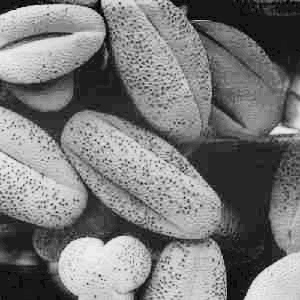

In [ ]:
# Obtemos a nova imagem com histograma especificado pela imagem de Einstein
im_polen_especificada = especificar_histograma(imagem_einstein, funcao_equalizacao(im_polen))
im_polen_especificada.save("polen_especificada.png")
im_polen_especificada


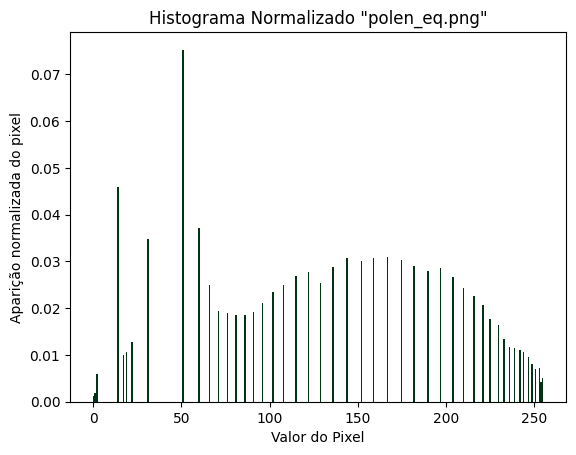

In [ ]:
hist_norm_polen_eq = calc_hist_norm(calc_histograma(im_polen_eq), im_polen_eq)
valores = list(range(256))
plt.bar(valores, hist_norm_polen_eq, color="#003413")
plt.title("Histograma Normalizado \"polen_eq.png\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Aparição normalizada do pixel")
plt.show()

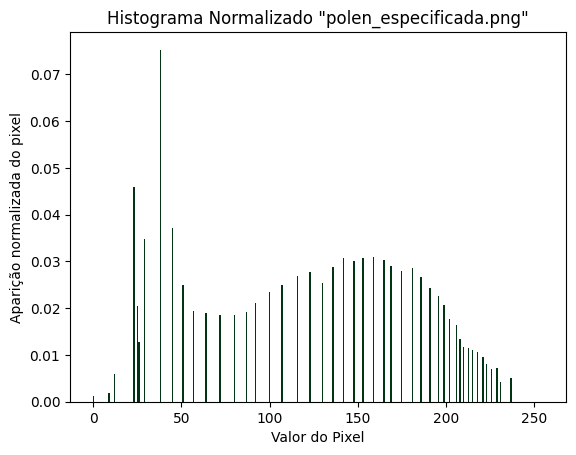

In [ ]:
hist_norm_polen_esp = calc_hist_norm(calc_histograma(im_polen_especificada), im_polen_especificada)
valores = list(range(256))
plt.bar(valores, hist_norm_polen_esp, color="#003413")
plt.title("Histograma Normalizado \"polen_especificada.png\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Aparição normalizada do pixel")
plt.show()

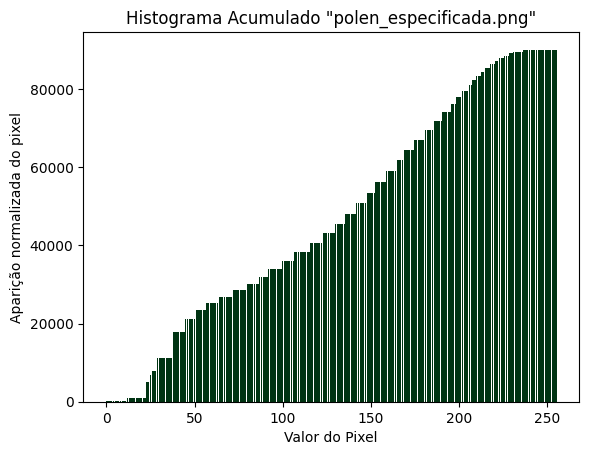

In [ ]:
hist_acum_polen_esp = calc_hist_acum(calc_histograma(im_polen_especificada))
valores_acum = list(range(256))
plt.bar(valores_acum, hist_acum_polen_esp, color="#003413")
plt.title("Histograma Acumulado \"polen_especificada.png\"")
plt.xlabel("Valor do Pixel")
plt.ylabel("Aparição normalizada do pixel")
plt.show()